# <span style='color:red'> Mall Customers Segmentation </span>

## Helping malls to increase their profits and Customer Acquisition by using Hierarchical Clustering to group the customers based on their spending score

### <span style='color:purple'> Importing the required Libraries </span>

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [28]:
#Importing dataset
df = pd.read_csv("Mall_Customers.csv")

In [29]:
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


#### We notice that there are two columns Annual Income which depicts the Annual Income of an individual and Spending Score which the amount they spend on a scale of 1-100

In [30]:
print(f"size of dataset:{df.shape}")

size of dataset:(200, 2)


In [31]:
#Checking for presence of Null Values
df.isnull().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### <span style='color:purple'> Data Visualization </span>

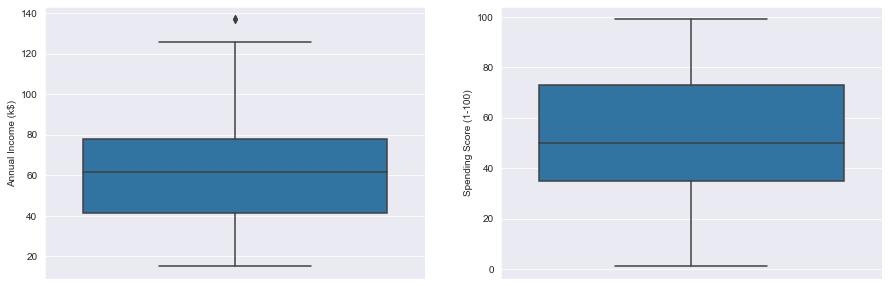

In [32]:
#Checking for Outliers using Boxplot
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=df, y="Annual Income (k$)")
plt.subplot(1,2,2)
sns.boxplot(data=df,y="Spending Score (1-100)")
plt.show()

#### We Observe that there are no Outliers

C:\Users\kamat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


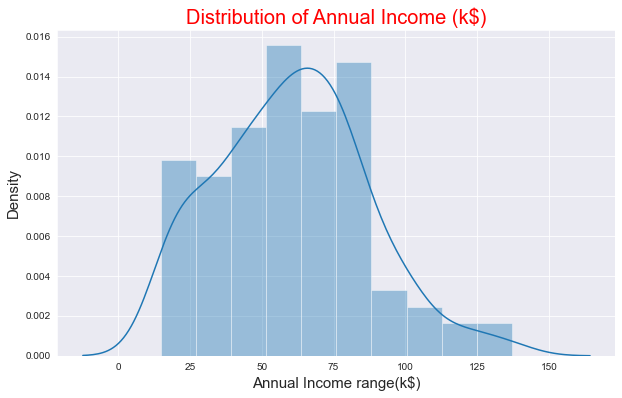

In [33]:
#Distribution of Annual Income
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.distplot(df["Annual Income (k$)"])
plt.title("Distribution of Annual Income (k$)", fontsize=20, color="red")
plt.xlabel("Annual Income range(k$)", fontsize=15)
plt.ylabel("Density", fontsize=15)

plt.show()

C:\Users\kamat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


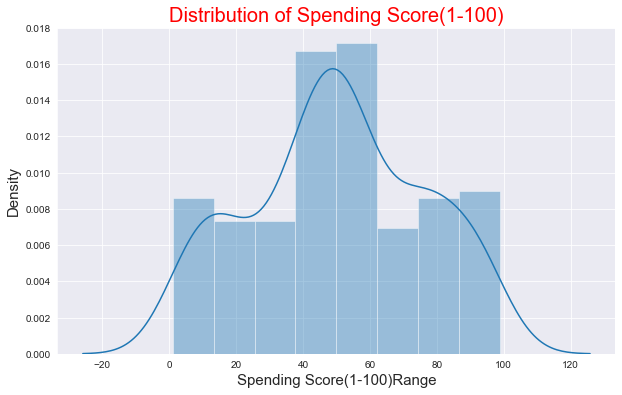

In [34]:
#Distribution Of Spending Score
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.distplot(df["Spending Score (1-100)"])
plt.title("Distribution of Spending Score(1-100)", fontsize=20, color="red")
plt.xlabel("Spending Score(1-100)Range", fontsize=15)
plt.ylabel("Density", fontsize=15)

plt.show()

#### We see that most of the spending scores are between 40 and 60

### <span style='color:purple'> Using Dendrogram to find optimal number of clusters </span>

In [35]:
X = df.iloc[:, :].values

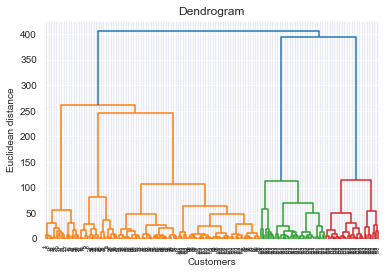

In [36]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distance")
plt.show()

#### From the above Dendrogram we find that Optimal number of Clusters is 5

### <span style='color:purple'>  Training the model </span>

In [37]:
clustering = AgglomerativeClustering(n_clusters = 5)
y_hc = clustering.fit_predict(X)

In [38]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

### <span style='color:purple'>  Visualising the clusters </span>

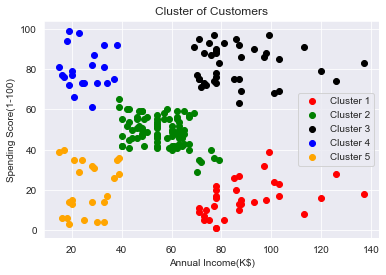

In [39]:
plt.scatter(X[y_hc == 0 , 0] ,X[y_hc == 0 , 1], c = 'red' , label = 'Cluster 1' )
plt.scatter(X[y_hc == 1 , 0] ,X[y_hc == 1 , 1], c = 'green' , label = 'Cluster 2' )
plt.scatter(X[y_hc == 2 , 0] ,X[y_hc == 2 , 1], c = 'black' , label = 'Cluster 3' )
plt.scatter(X[y_hc == 3 , 0] ,X[y_hc == 3 , 1], c = 'blue' , label = 'Cluster 4' )
plt.scatter(X[y_hc == 4 , 0] ,X[y_hc == 4 , 1], c = 'orange' , label = 'Cluster 5' )
plt.title("Cluster of Customers")
plt.xlabel("Annual Income(K$)")
plt.ylabel("Spending Score(1-100)")
plt.legend()
plt.show()

## From the above plot we observe that more importance/offers must be given to the Red Cluster region whose Annual Income is high but Spending Score is less so that they would start spending more. The main aim of Blue and Black regions are Customer Retention as their Spending Score is high. Due to the Yellow Region's lower annual income and consequently lower profits, we might prefer not to focus there.